# Import libraries

In [46]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load data set folder 

In [47]:
dataset_path = "..\.\dataset"

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20644\1016371770.py:1: SyntaxWarning: invalid escape sequence '\.'
  dataset_path = "..\.\dataset"


## Get all class folder from data set

In [48]:
classes = sorted(os.listdir(dataset_path))
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")

Number of classes: 10
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Count total images and per-class distribution

In [49]:
total_images = 0
class_count = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    count = len(os.listdir(class_path))
    class_count.append(count)
    total_images += count
    print(f"Class {cls}: {count} images")

print(f"Total images in dataset: {total_images}")

Class 0: 150 images
Class 1: 150 images
Class 2: 150 images
Class 3: 150 images
Class 4: 150 images
Class 5: 150 images
Class 6: 150 images
Class 7: 150 images
Class 8: 150 images
Class 9: 150 images
Total images in dataset: 1500


# 1. Class Distribution Visualization

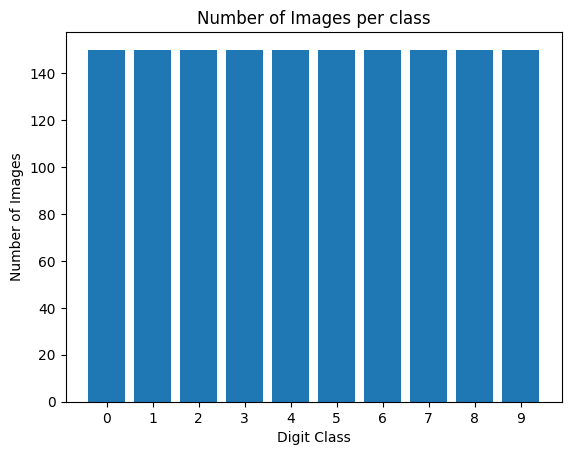

In [50]:
plt.Figure(figsize=(10, 5))
plt.bar(classes, class_count)
plt.title("Number of Images per class")
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")

plt.show()

## 2. Sample Images from Each Class

In [51]:
# let sample for 12 and 6
plt.Figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

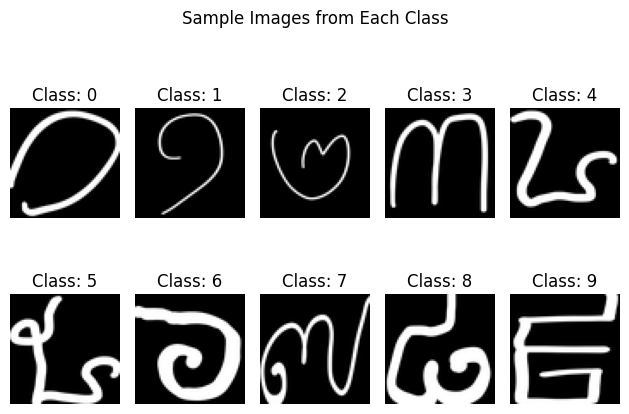

In [52]:
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    # Get first image from each class
    imag_path = os.path.join(class_path, images[0]) # images[0] mean get first images
    img = cv2.imread(imag_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB


     # Display the image
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis('off')

plt.suptitle('Sample Images from Each Class')
plt.tight_layout()
plt.show()


## 3.Images processing

### 3.1 Select one sample image

In [53]:
sample_class = classes[0]
sample_path = os.path.join(dataset_path, sample_class)
sample_img_name = os.listdir(sample_path)[0]
img_path = os.path.join(sample_path, sample_img_name)

print(f"Processing image from class: {sample_class}")
print(f"Image path: {img_path}")

Processing image from class: 0
Image path: ..\.\dataset\0\PNG image 2.png0 rotated.png


### Step 1: load test images

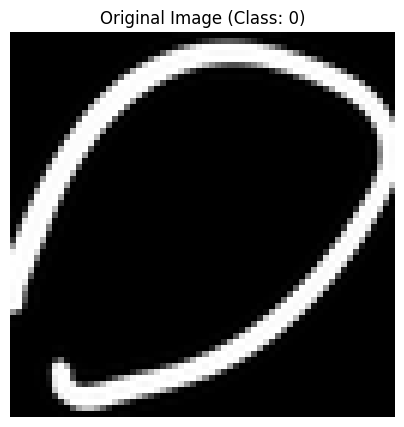

Original image size: 64x64 pixels


In [54]:
# Step 1: Load the original image
original_img = cv2.imread(img_path)
original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(5, 5))
plt.imshow(original_rgb)
plt.title(f"Original Image (Class: {sample_class})")
plt.axis('off')
plt.show()

print(f"Original image size: {original_img.shape[1]}x{original_img.shape[0]} pixels")

###  Step 2: Resize the image to 28x28

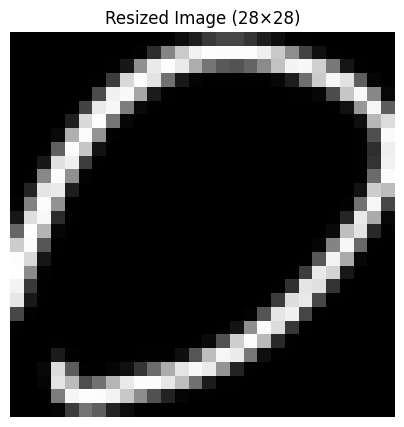

Image resized to 28x28 pixels
New shape: (28, 28, 3)


In [55]:

resized = cv2.resize(original_img, (28, 28), interpolation=cv2.INTER_AREA)
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

# Display resized image
plt.figure(figsize=(5, 5))
plt.imshow(resized_rgb)
plt.title("Resized Image (28×28)")
plt.axis('off')
plt.show()

print("Image resized to 28x28 pixels")
print(f"New shape: {resized.shape}")

### Step 3: Normalize pixel values from 0-255 to 0-1

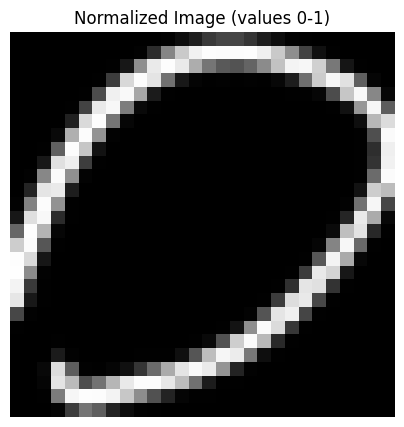

Pixel values normalized to range 0-1
Original values range: 0-255
Normalized values range: 0.0-1.0


In [56]:

normalized = resized / 255.0

# Display normalized image properly
plt.figure(figsize=(5, 5))
# For single-channel images use cmap='gray'
# For 3-channel images, convert to RGB first
if len(normalized.shape) == 2:
    plt.imshow(normalized, cmap='gray')
else:
    # Convert to RGB for display
    normalized_rgb = cv2.cvtColor((normalized*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(normalized_rgb)
    
plt.title("Normalized Image (values 0-1)")
plt.axis('off')
plt.show()

print("Pixel values normalized to range 0-1")
print(f"Original values range: 0-255")
print(f"Normalized values range: {normalized.min():.1f}-{normalized.max():.1f}")

###  Show the 3 different

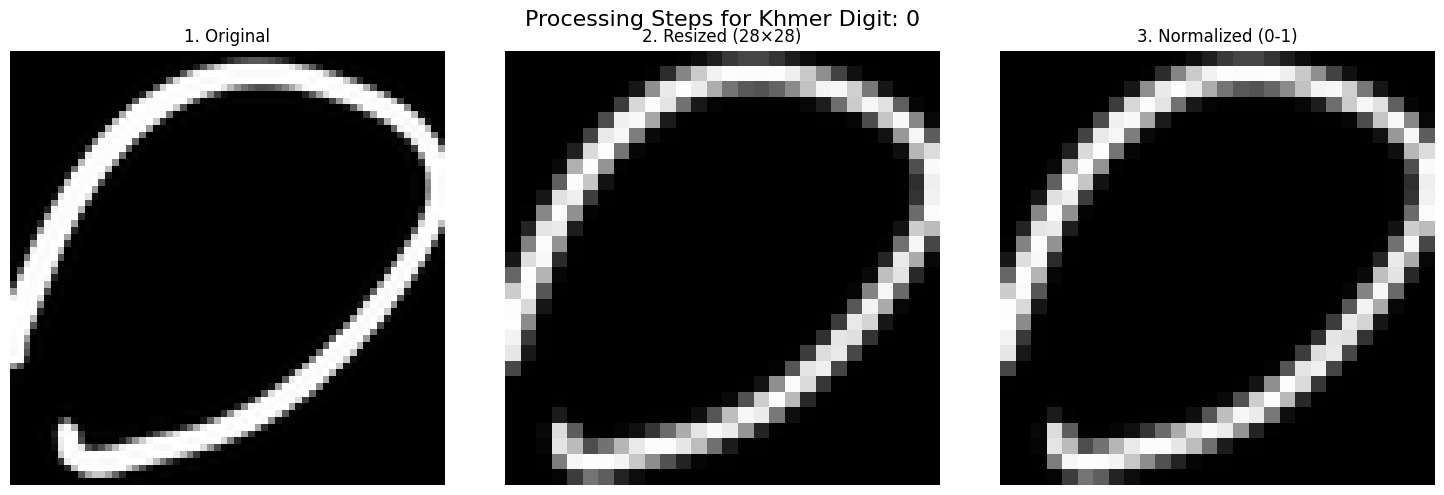

In [57]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(original_rgb)
axes[0].set_title("1. Original")
axes[0].axis('off')

# Resized image
axes[1].imshow(resized_rgb)
axes[1].set_title("2. Resized (28×28)")
axes[1].axis('off')

# Normalized image - properly convert for display
if len(normalized.shape) == 2:
    axes[2].imshow(normalized, cmap='gray')
else:
    # Convert to RGB for display
    normalized_rgb = cv2.cvtColor((normalized*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    axes[2].imshow(normalized_rgb)
    
axes[2].set_title("3. Normalized (0-1)")
axes[2].axis('off')

plt.suptitle(f"Processing Steps for Khmer Digit: {sample_class}", fontsize=16)
plt.tight_layout()
plt.show()

###  Process one image from each class (digits 0-9)

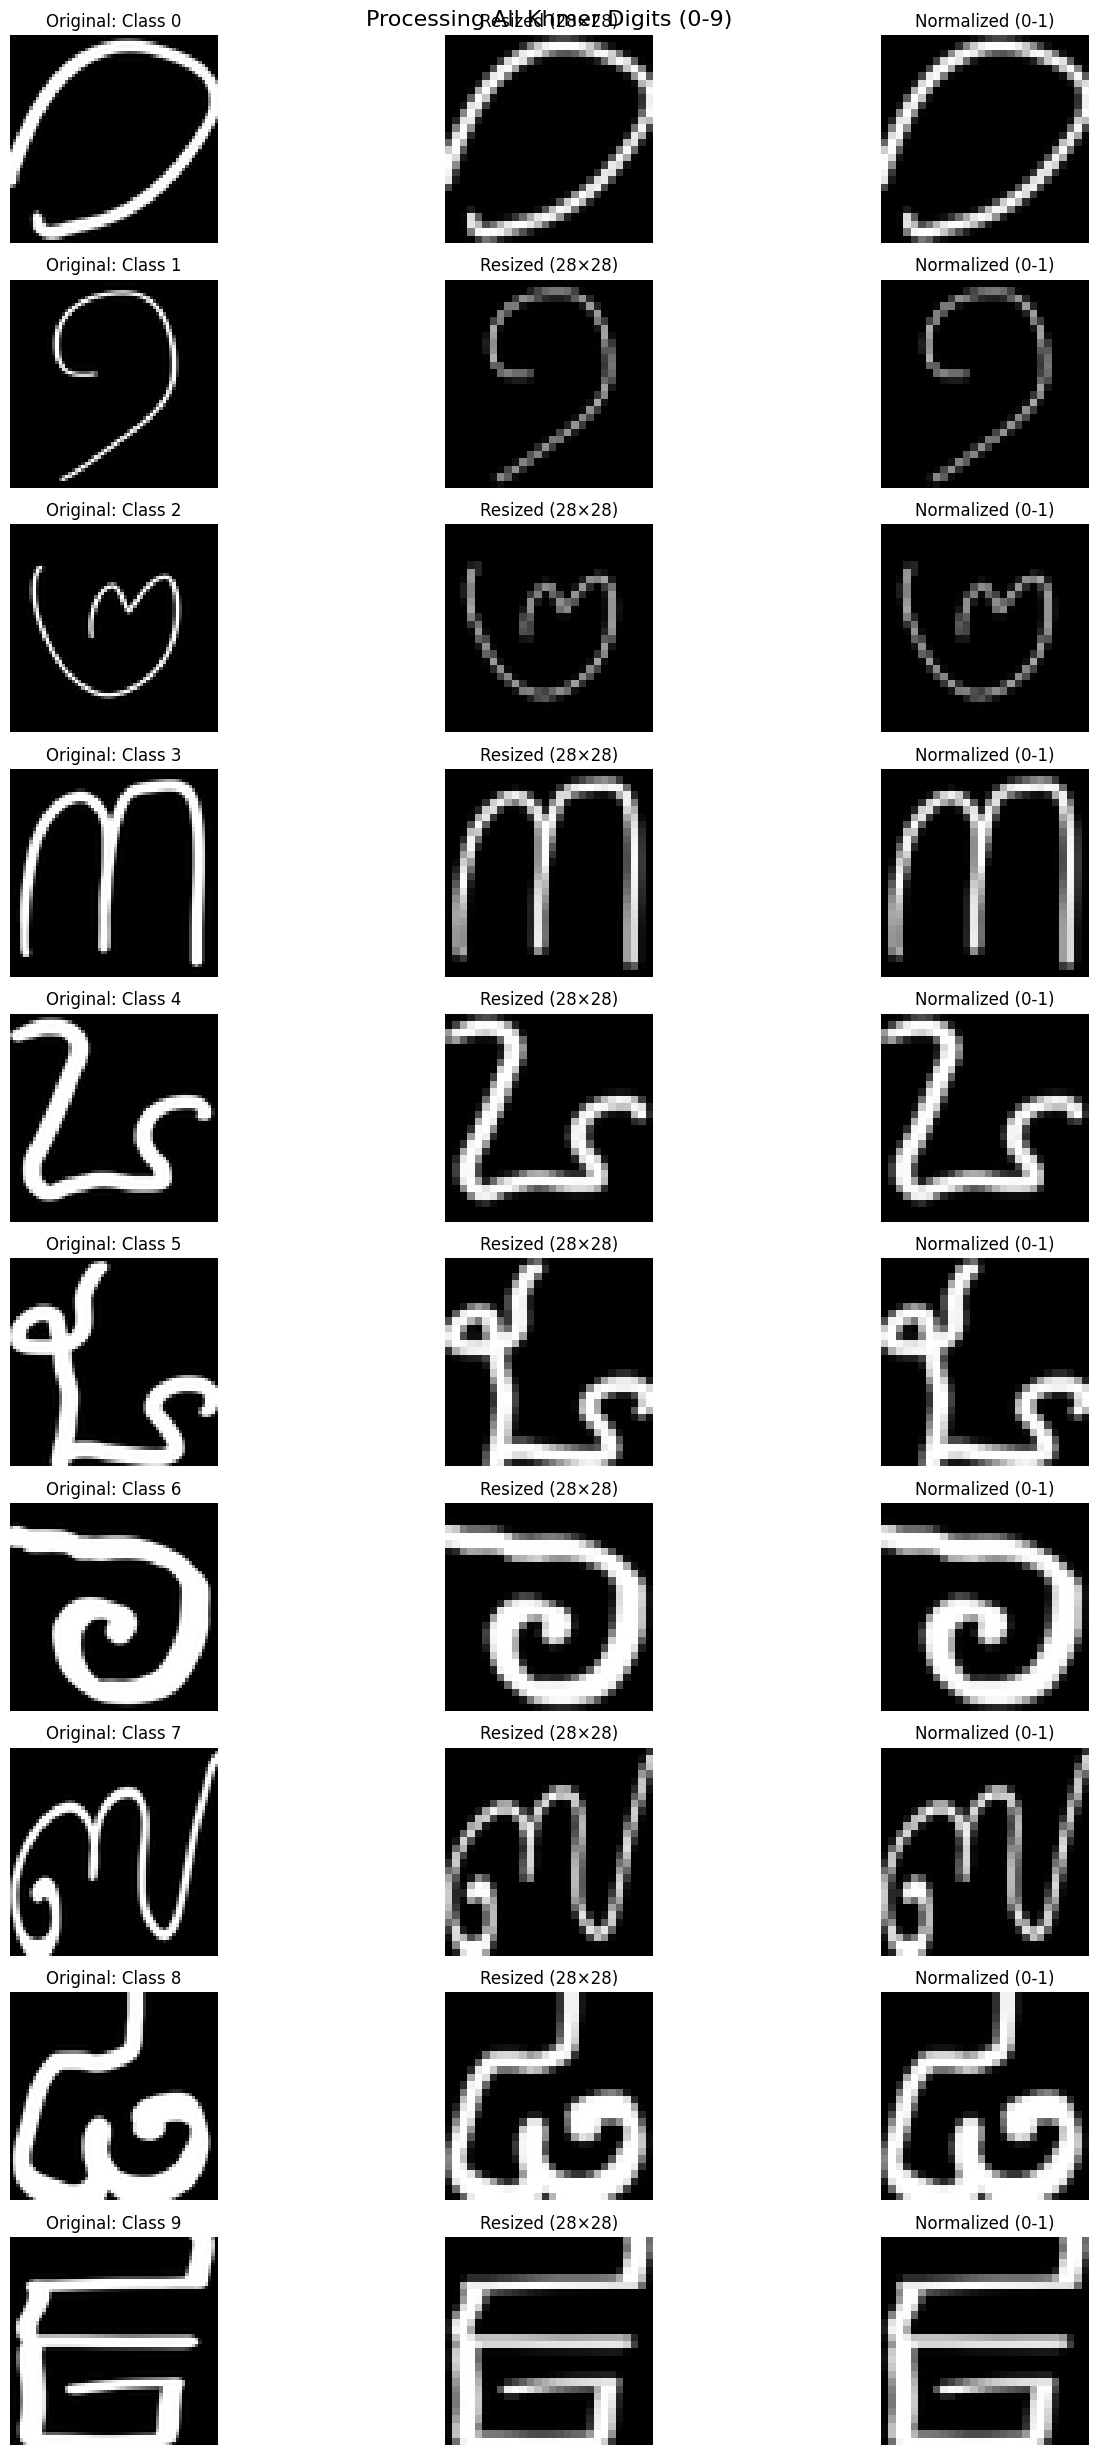

Processed Khmer digit classes in order: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [58]:

plt.figure(figsize=(15, 25))  # Taller figure to fit all 10 digits

# Process all classes in order
for i, digit_class in enumerate(classes):
    # Select an image from this class
    class_path = os.path.join(dataset_path, digit_class)
    img_name = os.listdir(class_path)[0]  # Just take first image
    img_path = os.path.join(class_path, img_name)
    
    # Process the image
    # Step 1: Load the image
    original = cv2.imread(img_path)
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    
    # Step 2: Resize the image
    resized = cv2.resize(original, (28, 28), interpolation=cv2.INTER_AREA)
    resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    
    # Step 3: Normalize the image
    normalized = resized / 255.0
    
    # Display original image
    plt.subplot(10, 3, i*3+1)
    plt.imshow(original_rgb)
    plt.title(f"Original: Class {digit_class}")
    plt.axis('off')
    
    # Display resized image
    plt.subplot(10, 3, i*3+2)
    plt.imshow(resized_rgb)
    plt.title(f"Resized (28×28)")
    plt.axis('off')
    
    # Display normalized image
    plt.subplot(10, 3, i*3+3)
    if len(normalized.shape) == 2:
        plt.imshow(normalized, cmap='gray')
    else:
        normalized_rgb = cv2.cvtColor((normalized*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
        plt.imshow(normalized_rgb)
    plt.title(f"Normalized (0-1)")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Processing All Khmer Digits (0-9)", fontsize=16)
plt.subplots_adjust(top=0.97)
plt.show()

# Print all processed classes in order
print("Processed Khmer digit classes in order:", classes)

## 5.Show variations within a single class

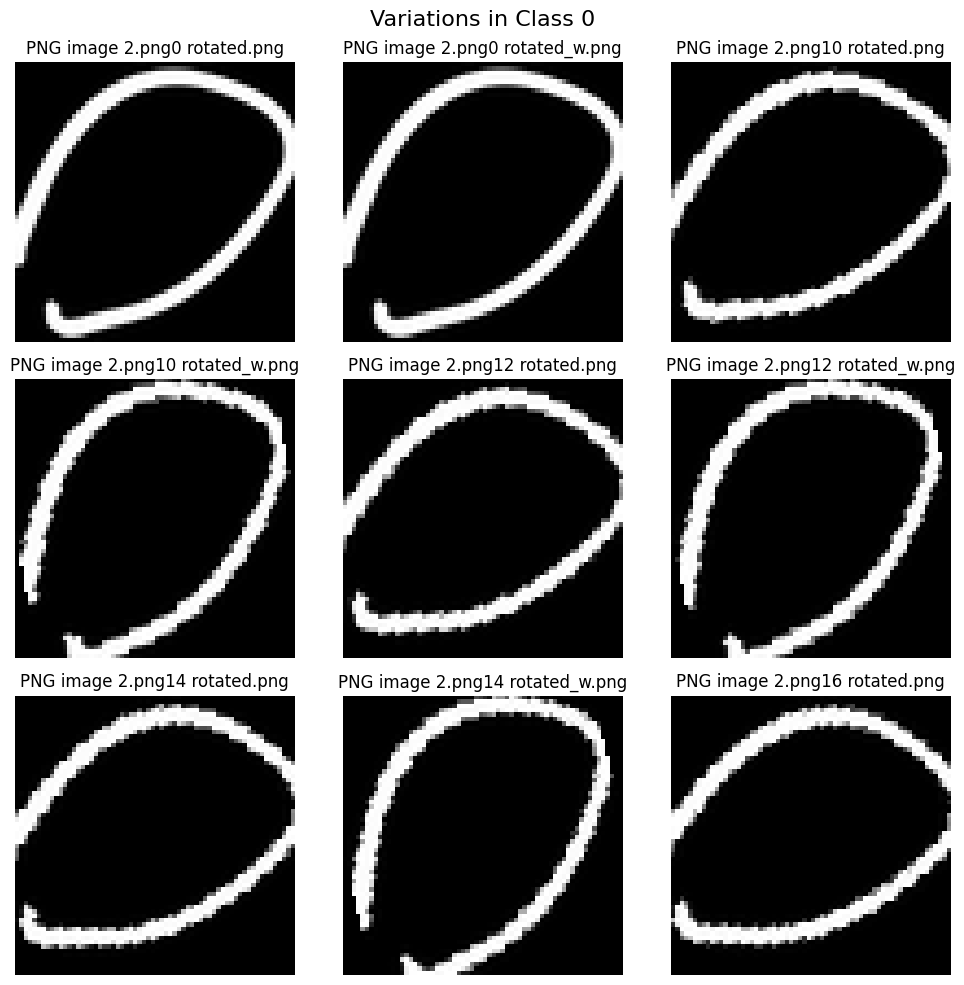

In [ ]:

selected_class = classes[0]  # Pick one class
class_path = os.path.join(dataset_path, selected_class)
images = os.listdir(class_path)[:9]  # Show 9 examples

plt.figure(figsize=(10, 10))
for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(f"{img_name}")
    plt.axis('off')
    
plt.suptitle(f"Variations in Class {selected_class}", fontsize=16)
plt.tight_layout()
plt.show()